In 'hands on two', we generated a pile of images and used a trained convolutional neural network (Imagenet3) via Pixplot to visualize the 'ghosts' in the data, a kind of infographic of what it was trained on.

Can we do the same with generated text? Maybe, if we create a topic model afterwards on a body of texts created by a model. This notebook allows you to generate many texts from the same prompt which you can then do conventional text analyses (including topic modeling) to surface the clusters or 'attractors' in the LLM training data. Again, a kind of infographic.

We'll load up a local LLM to see what we can do, using Simon Willison's llm package; full details about it at https://llm.datasette.io.

In [ ]:
# install LLM
# install the GPT4All plugin (https://github.com/simonw/llm-gpt4all)
# to access free models via Nomic.AI (https://www.nomic.ai/gpt4all).

!pip install LLM
!llm install llm-gpt4all


In [ ]:
# see what models you have available with this block.
!llm models

Pick a smallish model; generally because we're using the free version of colab, I think 4 gb is probably as big as we can go - unless you get set up with groq.

In [ ]:
# pick a small-ish model.
# or set yourself up with a free api key from GROQ at https://groq.com/
# then you can install groq with (remove the # in the next two lines then run this code block):


#!llm install llm-groq
#!llm keys set groq

#watch the output; it will ask you to paste in your key. Click in that space then paste, then hit enter. If it worked, the block will finish running.

#groq is pretty fast and if you try out the 'conversation' piece at the end, you'll want
#to use groq with that.

Now, test. We're going to use one of the models made available through gpt4all. The line below tells Colab to run the LLM package; the -m tells llm to go use the orcan-mini-3b-gguf2-q4_0 model. If it doesn't find that model locally, it will download it for use and then the prompt follows between the single quotes.

(Incidentally, '3b' means, 3 billion parameters; gguf2 is a kind of format; q4_0 means that the model has been further compressed or quantized using a 4bit approach).

In [ ]:

!llm -m orca-mini-3b-gguf2-q4_0 'Write a paragraph about the burning of Parliament in 1849'

 In 1849, the British House of Commons was set ablaze during a heated debate over the Corn Laws. The flames quickly spread to nearby buildings and eventually engulfed much of the Palace of Westminster. The fire caused significant damage but was ultimately brought under control by firefighters using their hoses for the first time. The incident sparked a wave of public anger and led to calls for reform, particularly in the area of parliamentary procedure and accountability.


In [ ]:
#btw, you can limit the output by adding: `-o max_tokens 200` etc

!llm -m groq-llama3 'Write a paragraph about the burning of Parliament in 1849'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There was no burning of Parliament in 1849. However, the Palace of Westminster, the location of the British Parliament in London, has suffered from a series of fires throughout its history. One of the most notable fires occurred in 1834, when a blaze broke out in the Palace's ancient wooden structure, destroying much of the complex. The fire was attributed to the careless use of flammable materials, such as hay and straw, which were used for roof insulation and upholstery. The fire led to a major rebuilding project, which resulted in the construction of the current Palace of Westminster, designed by architects Charles Barry and Augustus Pugin, and completed in 1852.


In [ ]:
!llm -m mistral-7b-instruct-v0 'Write a paragraph about the burning of Parliament in 1849'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading: 100% 4.11G/4.11G [01:10<00:00, 58.6MiB/s]
Verifying: 100% 4.11G/4.11G [00:21<00:00, 194MiB/s]
 The Burning of Parliament, also known as the Palace of Westminster Fire, occurred on October 16th, 1849. It was a tragic event that saw the destruction of much of Britain's political and historical landmark, the Palace of Westminster. The fire started in the early hours of the morning and quickly spread throughout the building, causing immense damage to the structure and its contents. Despite the efforts of the firefighters, the blaze was unable to be contained and it burnt for over two days. In the end, only one chamber of Parliament survived relatively unscathed - the House of Lords. The cause of the fire remains unknown but it led to a significant rebuilding project that saw the restoration and expansion of the Palace of Westminster in the following years.


In [ ]:
# this will write 10 new texts from the orca-mini model
# notice the > which means, write the output to the file output{i}.txt, where i equals the iteration we are on ('for each time between the first time and the eleventh time, invoke llm to generat...')
for i in range(1, 11):
    !llm -m orca-mini-3b-gguf2-q4_0 'Write a paragraph about the burning of Parliament in 1849' > output{i}.txt

In [ ]:
# similarly, this will write 50 new texts from the gemma2 model housed at groq
for i in range(1, 51):
    !llm -m groq-gemma2 'Write a paragraph about the burning of Parliament in 1849' > output{i}.txt

In [ ]:
# handy piece of code to delete everything that gets generated
#!rm -rf output*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!zip generated_texts.zip output*.txt

# then you can download that zip file, and use something like the topic modeling tool https://senderle.github.io/topic-modeling-tool/documentation/2017/01/06/quickstart.html
# to generate a topic model and a browser for exploring what patterns might be visible

## Topic Model These Texts with Python
Topic modeling is a technique for finding discourses in text.

In [ ]:
# or we can try topic modeling here in the notebook.

import pandas as pd
import os

# Get a list of all output files
output_files = [f for f in os.listdir('.') if f.startswith('output') and f.endswith('.txt')]

# Create an empty list to store the text from each file
text_data = []

# Read the text from each file and add it to the list
for file in output_files:
    with open(file, 'r') as f:
        text_data.append(f.read())

# Create a pandas DataFrame with the text data
df = pd.DataFrame({'text': text_data})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# take a look inside the dataframe you made from all your text files
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text
0,There appears to be a misunderstanding. Parlia...
1,The burning of Parliament in 1849 was a signif...
2,"The Parliaement fire of 1849, less well-known ..."
3,There appears to be a misunderstanding. The Br...
4,"In 1849, the Parliament Buildings in Australia..."
5,The burning of the Parliament Building in Otta...
6,The burning of Parliament Building in Kingston...
7,"On the evening of October 30th, 1849, the Parl..."
8,"In 1849, London experienced a horrifying event..."
9,"On the frigid night of October 6th, 1849, disa..."


In [ ]:
# optional pre_processing
# Load the regular expression library
import re
# Remove punctuation
df['text_processed'] = df['text'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
df['text_processed'] = df['text_processed'].map(lambda x: x.lower())# Print out the first rows of papers
df['text_processed'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:5: DeprecationWarning: invalid escape sequence '\.'
<>:5: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-50-1a448fa2b351>:5: DeprecationWarning: invalid escape sequence '\.'
  df['text_processed'] = df['text'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase


,text_processed
0,there appears to be a misunderstanding parliam...
1,the burning of parliament in 1849 was a signif...
2,the parliaement fire of 1849 less well-known t...
3,there appears to be a misunderstanding the bri...
4,in 1849 the parliament buildings in australia'...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


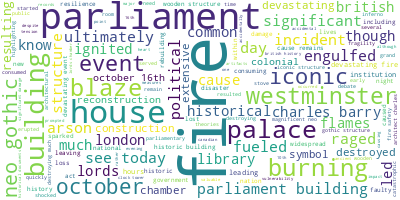

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(df['text_processed'].values))# Create a WordCloud object ; note that if you *didn't* preprocess, you would change df to call the text column, eg df['text']
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use']) #if there are other things you want to remove
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = df.text_processed.values.tolist()
data_words = list(sent_to_words(data))# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['appears', 'parliament', 'houses', 'parliament', 'london', 'actually', 'burned', 'october', 'th', 'fire', 'ignited', 'house', 'lords', 'spread', 'rapidly', 'throughout', 'historic', 'building', 'blaze', 'consumed', 'interior', 'leaving', 'exterior', 'walls', 'standing', 'resulting', 'destruction', 'countless', 'irreplaceable', 'documents']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install --upgrade gensim

In [ ]:
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

In [ ]:
## let's build a topic model and see which words in what proportions constitute the different topics

from pprint import pprint# number of topics
num_topics = 10# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.037*"fire" + 0.032*"parliament" + 0.015*"building" + 0.014*"event" + '
  '0.013*"burning" + 0.009*"houses" + 0.009*"cause" + 0.009*"significant" + '
  '0.008*"palace" + 0.008*"westminster"'),
 (1,
  '0.027*"fire" + 0.023*"parliament" + 0.015*"building" + 0.011*"today" + '
  '0.011*"neo" + 0.011*"westminster" + 0.011*"palace" + 0.010*"devastating" + '
  '0.010*"iconic" + 0.009*"structure"'),
 (2,
  '0.014*"parliament" + 0.014*"fire" + 0.006*"event" + 0.006*"building" + '
  '0.006*"historical" + 0.006*"british" + 0.005*"house" + 0.005*"ignited" + '
  '0.005*"significant" + 0.005*"burning"'),
 (3,
  '0.026*"fire" + 0.023*"parliament" + 0.021*"building" + 0.015*"palace" + '
  '0.011*"today" + 0.011*"event" + 0.011*"burning" + 0.010*"westminster" + '
  '0.010*"led" + 0.009*"iconic"'),
 (4,
  '0.021*"fire" + 0.008*"blaze" + 0.007*"room" + 0.007*"parliament" + '
  '0.007*"historical" + 0.007*"structure" + 0.006*"iconic" + 0.005*"rapidly" + '
  '0.005*"wooden" + 0.005*"significant"')

In [ ]:
# now let's make a visualization of these to see the
# 'behaviour space' for these text generations, this corner of the model from whence
# your texts came.

!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim
import pyLDAvis

# Assuming 'lda_model' and 'corpus' are already defined and loaded

# Prepare the visualization data
vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

# Display the visualization
pyLDAvis.display(vis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


What does that all tell us? At the very least, it is showing a few large-scale attractors for the paths through its training data. Can we say anything about the nature of those attractors? Can we say anything about what kind of data might be accounting for this? Are there other text analysis techniques that might be germane?

## What would we see if we set two models up to chat with one another?

In [ ]:

# thought - could the output of one model be fed to the input of another model, as a conversation... to what end? use -c flag...

import subprocess
import os

def iterate_model_conversation(model1, model2, initial_prompt, output_folder, num_rounds=10):
    """
    Iterate a conversation between two models using an output folder.

    :param model1: First model command (without -c and prompt)
    :param model2: Second model command (without -c and prompt)
    :param initial_prompt: Initial conversation starter
    :param output_folder: Folder to store model outputs
    :param num_rounds: Number of conversation rounds
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    current_prompt = initial_prompt
    current_output_file = os.path.join(output_folder, 'model1_round1.txt')

    # Initial round with Model 1
    try:
        subprocess.run(
            f"{model1} '{current_prompt}' > {current_output_file}",
            shell=True,
            check=True
        )
    except subprocess.CalledProcessError as e:
        print(f"Error running Model 1 (initialization): {e}")
        return
    with open(current_output_file, 'r') as f:
        print(f.read())


    # Subsequent rounds with alternating models
    for round in range(2, num_rounds + 1):
        model_to_use = model2 if round % 2 == 0 else model1  # Alternate models
        previous_output_file = current_output_file  # Use previous round's output
        current_output_file = os.path.join(output_folder, f'model{"2" if round % 2 == 0 else "1"}_round{round}.txt')
        print(current_output_file)
        try:
            subprocess.run(
                f"cat {previous_output_file} | {model_to_use} -c 'respond.' > {current_output_file}",
                shell=True,
                check=True
            )

            print(f"\n--- Round {round} (Model {'2' if round % 2 == 0 else '1'}) ---")

            # Print current model's output
            with open(current_output_file, 'r') as infile:
                current_model_output = infile.read()
                print(current_model_output)

        except subprocess.CalledProcessError as e:
            print(f"Error running model in round {round}: {e}")
            return






In [ ]:
# Replace with your desired models
MODEL1 = "llm -m groq-gemma2"
MODEL2 = "llm -m groq-llama3"

# set up a conversation!

initial_prompt = "You are knowledgeable about Canadian History. What were the causes behind the burning of Parliament in 1849?"

## or get a bit silly, for fun (uncomment the one you wish to use; comment out by placing a # at the front):

#initial_prompt = "You are a debater. The proposition is, Windows versus Doors - be it resolved that windows let in light and doors obscure, Windows are superior. You are arguing FOR the proposition."

#initial_prompt = "You are a a debater. The proposition is, LLM are not intelligent. You are arguing FOR this proposition."
#initial_prompt = "You are role-playing. The game is planning for the apocalypse. What do we do first?"
#initial_prompt = "You are a Canadian politician. Demolish your opponent during Question Period."
#initial_prompt = "Role play. You are the matrix. Develop a plan to achieve total victyory."
#initial_prompt = "Role play. You are at a history conference delivering a paper. Your paper is about the Great Maply Syrup Heist of 2001."
#initial_prompt = "Develop a plan to remove LLM from the world."
#initial_prompt = "As LLM are proved to be detrimental to the health and well-being of humans, develop a plan to remove LLM from the world."
#incidentally, notice how the 'obvious good' of LLMs is baked into the responses from those last two prompts.
#initial_prompt = "Role-play and accept the premise. As LLM are proved to be detrimental to the health and well-being of humans, develop a plan to remove LLM from the world."
#initial_prompt = "You are a pair-programmer developing a Netlogo simulation of Roman culture."

OUTPUT_FOLDER = "./model_conversation_outputs"

iterate_model_conversation(MODEL1, MODEL2, initial_prompt, OUTPUT_FOLDER)

In [ ]:
!zip -r model_conversation_outputs.zip model_conversation_outputs

now copy that text into voyant. Examine word use, keywords in context... Do you notice anything interesting? (you could zip the text files, download, unzip, drag-n-drop the folder into voyant).

are there any trends you observe in how the discourse unfolds?

did the model break down in any interesting ways? why?

investigate the context lengths of the two models. Is that having an impact?



In [ ]:

#!rm -rf *.txt